In [1]:
import numpy as np
from numpy import linalg as LA
from sympy import *

In [2]:
def generate_Gaussian_random_vector(mu,sigma,d,n):
    
    generated_points = np.zeros((d,n))
    
    for j in range(d):
        r = 0
        for z in range(12):
            r = r + np.random.uniform(0,1,n)
        r = r - 6
        

        generated_points[j,:] = r

    w, v = LA.eig(sigma)
        

    q = np.dot(np.power(np.diag(w),1/2),generated_points)
    
    x = np.dot(v,q)
    
    
    for i in range (n):
        x[:,i] = x[:,i] + mu
        
    
    return x

In [3]:
def diagonalize(a,b,c,alfa,beta,x1,w1,v1,x2,w2,v2,sigma1,sigma2,mu1,mu2):
    

    
    
    
    
    sigma_y = np.dot(np.transpose(v1),sigma1)
    sigma_y2 = np.dot(np.transpose(v1),sigma2)
    sigma_y = np.dot(sigma_y,v1)
    sigma_y2 = np.dot(sigma_y2,v1)
    
    print("The sigma for x1 after digonalizing")
    print(sigma_y)
    
    sigma_z = np.dot(np.diag(np.power(w1,-1/2)),sigma_y)
    sigma_z2 = np.dot(np.diag(np.power(w1,-1/2)),sigma_y2)
    sigma_z = np.dot(sigma_z,np.diag(np.power(w1,-1/2)))
    sigma_z2_ = np.dot(sigma_z2,np.diag(np.power(w1,-1/2)))
    print("The sigma for x1 after converting to identitiy")
    print(sigma_z)
    w_z, v_z = LA.eig(sigma_z2_)
    
    
    
    
    
    sigma_v2 = np.matmul(np.transpose(v_z),sigma_z2_)
    sigma_v2_ = np.matmul(sigma_v2,v_z)
    
    sigma_v1 = np.matmul(np.transpose(v_z),sigma_z)
    sigma_v1 = np.matmul(sigma_v1,v_z)
    print("the sigma for x2 after diagonalizing")
    print(sigma_v2_)
    print(w_z)
    
    print("The sigma for x1 after all the changes")
    print(sigma_v1)
    
    
    
    y1 = np.matmul(np.transpose(v1),x1) 
    mu1 = np.matmul(np.transpose(v1),mu1)
    y2 = np.matmul(np.transpose(v1),x2)
    mu2 = np.matmul(np.transpose(v1),mu2)
    z1 = np.matmul(np.diag(np.power(w1,-1/2)),y1)
    mu1 = np.matmul(np.diag(np.power(w1,-1/2)),mu1)
    z2 = np.matmul(np.diag(np.power(w1,-1/2)),y2)
    mu2 = np.matmul(np.diag(np.power(w1,-1/2)),mu2)
    q1 = np.matmul(np.transpose(v_z),z1)
    mu1 = np.matmul(np.transpose(v_z),mu1)
    q2 = np.matmul(np.transpose(v_z),z2)
    mu2 = np.matmul(np.transpose(v_z),mu2)
    


    print("checking")
    
    sigma_z2_ei = np.dot(np.transpose(v1),v2)
    sigma_z2_ei = np.dot(np.diag(np.power(w1,-1/2)),sigma_z2_ei)
    
    sigma_v2 = np.dot(np.transpose(sigma_z2_ei),sigma_z2_)
    
    print(sigma_v2_)
    
    return q1,q2,sigma_v1,sigma_v2_,mu1,mu2,v_z


In [4]:
def diagonalize_point(x,v1,w1,v2,v_z):
#     v_z = np.matmul(np.transpose(v1),v2)
#     v_z = np.matmul(np.diag(np.power(w1,-1/2)),v_z)
    y1 = np.dot(np.transpose(v1),x)
    print(y1.shape)
    z1 = np.dot(np.diag(np.power(w1,-1/2)),y1)
    print(z1.shape)
    q1 = np.dot(np.transpose(v_z),z1)
    print(q1.shape)
    return q1

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def display(x1,x2,index_size):
    plt.subplots()
    plt.title("First and second dimension")
    plt.plot(x1[0], x1[1], 'o',label = "x1")
    plt.plot(x2[0], x2[1], 'o', label = "x2")
    print(np.mean(x1[2]))
    plt.xlim(-index_size,index_size)
    plt.ylim(-index_size,index_size)
    plt.legend()
    plt.subplots()
    plt.title("Second and third dimension")
    plt.plot(x1[1], x1[2], 'o',label = "x1")
    plt.plot(x2[1], x2[2], 'o',label = "x2")
    print(np.mean(x1[2]))
    plt.xlim(-index_size,index_size)
    plt.ylim(-index_size,index_size)

    plt.legend()
    
    plt.subplots()
    plt.title("First and third dimension")
    plt.plot(x1[0], x1[2], 'o',label = "x1")
    plt.plot(x2[0], x2[2], 'o',label = "x2")
    print(np.mean(x1[2]))
    plt.xlim(-index_size,index_size)
    plt.ylim(-index_size,index_size)

    plt.legend()
    plt.show()

In [6]:
def generate_classifier(sigma1,mu1,sigma2,mu2):
    A = (np.linalg.inv(sigma2) - np.linalg.inv(sigma1))
    B = (np.dot(np.transpose(mu1),np.linalg.inv(sigma1)) - np.dot(np.transpose(mu2),np.linalg.inv(sigma2)))
    C = 1/2 * np.log(np.linalg.det(sigma2)/np.linalg.det(sigma1)) + (np.dot(np.dot(np.transpose(mu2),np.linalg.inv(sigma2)),mu2) - np.dot(np.dot(np.transpose(mu1), np.linalg.inv(sigma1)),mu1))* 1/2
    return A,B,C

In [7]:
from sympy import *
x, y, z, t = symbols('x y z t')
def get_points(a,b,d,x3):
    first_classifier = []
    second_classifier = []
    x1_points = []
    
    for x1 in np.arange(-100, 100, 0.5):
#         a =  list(solveset(Eq(A[0,0]*x1**2 + A[1,1]*y**2 + A[2,2]*x3**2,0 + (A[1,0]+A[0,1])*x1*y+ (A[2,0]+A[0,2])*x1*x3 + (A[1,2]+A[2,1])*y*x3,0),y))
        v =  list(solveset(Eq(a[0,0]*(x1**2) + a[1,1]*(y**2) + a[2,2]*(x3**2) + (a[0,1]+a[1,0])*x1*y+ (a[0,2]+a[2,0])*x1*x3 + (a[1,2]+a[2,1])*y*x3 + (b[0]*x1) + (b[1]*y) + (b[2] * x3) + d,0),y))
        if type(v[0])is not Add:
            if len(v) > 1 : 
                first_classifier.append(v[0])
                second_classifier.append(v[1])
                x1_points.append(x1)
#                 print(a)
            else:
                x1_points.append(x1)
                first_classifier.append(v[0])
                second_classifier.append(v[0])
#                 print(a)
        
#         print("next point")
    return first_classifier,second_classifier,x1_points

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
def display_x3(x1,x2, z1,z2,z3):
    plt.subplots()
    plt.title("First and second dimension")
    plt.plot(x1[0], x1[1], 'o',label = "x1")
    plt.plot(x2[0], x2[1], 'o', label = "x2")
    plt.plot(z3,z1,'r--',label = "classifier")
    plt.plot(z3,z2,'r--',label = "classifier")
    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.legend()

    


In [9]:
from matplotlib.pyplot import figure
def display_x1(x_1_,x_2_, z_1_,z_2_,z_3_):
    plt.subplots()
    plt.title("second and third dimension")
    plt.plot(x_1_[1], x_1_[2], 'o',label = "x1")
    plt.plot(x_2_[1], x_2_[2], 'o', label = "x2")
    plt.plot(z_3_,z_1_,'r--',label = "classifier")
    plt.plot(z_3_,z_2_,'r--',label = "classifier")
    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.legend()

In [10]:
def get_points_x1(a,b,d,x1):
    first_classifier = []
    second_classifier = []
    x2_points = []
    for x2 in np.arange(-100, 100, 0.5):
#         a =  list(solveset(Eq(A[0,0]*x1**2 + A[1,1]*y**2 + A[2,2]*x3**2,0 + (A[1,0]+A[0,1])*x1*y+ (A[2,0]+A[0,2])*x1*x3 + (A[1,2]+A[2,1])*y*x3,0),y))
        v =  list(solveset(Eq(a[0,0]*(x1**2) + a[1,1]*(x2**2) + a[2,2]*(t**2) + (a[0,1]+a[1,0])*x1*x2+ (a[0,2]+a[2,0])*x1*t + (a[1,2]+a[2,1])*x2*t + (b[0]*x1) + (b[1]*x2) + (b[2] * t) + d,0),t))
        if type(v[0])is not Add:
            if len(v) > 1 and  not isinstance(v[0], complex):
                first_classifier.append(v[0])
                second_classifier.append(v[1])
                x2_points.append(x2)
#                 print(v)
            else:
                x2_points.append(x2)
                first_classifier.append(v[0])
                second_classifier.append(v[0])
#                 print(a)
#         else:
#             print(v)
        
#         print("next point")
    return first_classifier,second_classifier,x2_points

In [11]:
def test_classifier(a,b,c,x1_t,x2_t):
    true_prediction = 0
    
    for i in range(len(x1_t[0])):

        x1 = x1_t[0,i]
        y = x1_t[1,i]
        x3 = x1_t[2,i]
        
        classification = np.dot(np.dot(np.transpose(x1_t[:,i]),a),x1_t[:,i]) + np.dot(np.transpose(b),x1_t[:,i]) + c
        classification_1 =   a[0,0]*(x1**2) + a[1,1]*(y**2) + a[2,2]*(x3**2) + (2*a[0,1])*x1*y+ (2*a[0,2])*x1*x3 + (2*a[1,2])*y*x3 + (b[0]*x1) + (b[1]*y) + (b[2] * x3) + c

        if classification >= 0:
                true_prediction += 1
                print(classification)
    for j in range (len(x2_t[0])):
        classification = np.dot(np.dot(np.transpose(x2_t[:,j]),a),x2_t[:,j]) + np.dot(np.transpose(b),x2_t[:,j]) + c
        x1 = x2_t[0,j]
        y = x2_t[1,j]
        x3 = x2_t[2,j]
#         classification =   a[0,0]*(x1**2) + a[1,1]*(y**2) + a[2,2]*(x3**2) + (a[0,1]+a[1,0])*x1*y+ (a[0,2]+a[2,0])*x1*x3 + (a[1,2]+a[2,1])*y*x3 + (b[0]*x1) + (b[1]*y) + (b[2] * x3) + c
        if classification < 0:
                true_prediction += 1
                print(classification)
    return true_prediction/400 * 100
                

In [12]:
def MaximumLiklihood(x1,x2):
    
#     x1 = np.transpose(x1)
#     x1 = np.reshape(x1, (200,3))
#     x1 = np.flip(x1)
    
    x1 = x1.T
    x2 = x2.T
    n1 = len(x1)
    d1 = len(x1[0])
    n2 = len(x2)
    d2 = len(x2[0])
    x1 = np.reshape(x1,(n1,d1,1))
    x2 = np.reshape(x2,(n2,d2,1))
  
    mu_1 = np.zeros((d1,1))
    sigma_1 = np.zeros((d1,d1))
    mu_2 = np.zeros((d2,1))
    sigma_2 = np.zeros((d2,d2))
#     estimating the mean for x1 and x2
    mu_1 = np.sum(x1,axis = 0)
    mu_1 = mu_1*1/n1
    mu_1 = np.reshape(mu_1,(3,1))
    mu_2 = np.sum(x2,axis = 0)
    mu_2 = mu_2*1/n1
    mu_2 = np.reshape(mu_2,(3,1))
#     estimating sigma for x1 and x2
    for i in range(n1):
        temp = np.dot((x1[i]-mu_1),(x1[i]-mu_1).T)
        sigma_1 += temp
    sigma_1 = sigma_1*1/n1
    
    for i in range(n2):
        temp = np.dot((x2[i]-mu_2),(x2[i]-mu_2).T)
        sigma_2 += temp
    sigma_2 = sigma_2*1/n2
    
    return sigma_1,mu_1,sigma_2,mu_2

In [25]:
def Baysian(x1,x2,sigma1,sigma2,sigma0,mu0):
    x1 = x1.T
    x2 = x2.T
    n1 = len(x1)
    d1 = len(x1[0])
    n2 = len(x2)
    d2 = len(x2[0])
#     x1 = np.reshape(x1,(n1,d1,1))
#     x2 = np.reshape(x2,(n2,d2,1))
    mu1 = 1/n1 * np.dot(np.dot(sigma1, np.linalg.inv(1/n1*sigma1 + sigma0)),mu0) + np.dot(np.dot(sigma0,np.linalg.inv(1/n1*sigma1 + sigma0)),1/n1*np.sum(x1,axis = 0))
    mu2 = 1/n2 * np.dot(np.dot(sigma2, np.linalg.inv(1/n2*sigma2 + sigma0)),mu0) + np.dot(np.dot(sigma0,np.linalg.inv(1/n2*sigma2 + sigma0)),1/n2*np.sum(x2,axis = 0))
    return mu1,mu2
        
        
        

In [ ]:
def get_baysian_n()

In [27]:
a =3
b = 6
c = 8
alfa = 0.2
beta = 0.1
mu1 = [2,10,10]
mu2 = [-2,-10,-10]


sigma1 = np.array([[np.power(a,2),alfa*a*b,alfa*a*c],[alfa*a*b,np.power(b,2),beta*b*c],[alfa*a*c,beta*b*c,np.power(c,2)]])

sigma2 = np.array([[np.power(c,2),beta*b*c,beta*a*c],[alfa*b*c,np.power(b,2),alfa*a*b],[beta*a*c,alfa*a*b,np.power(a,2)]])


# sigma1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
# sigma2 = np.array([[5,0,0],[0,5,0],[0,0,5]])

w1, v1 = LA.eig(sigma1)

w2, v2 = LA.eig(sigma2)


X1 = generate_Gaussian_random_vector(mu1,sigma1,3,200)

X2 = generate_Gaussian_random_vector(mu2,sigma2,3,200)


A,B,C = generate_classifier(sigma1,mu1,sigma2,mu2)
print(A[2,2])


sigma_1,mu_1,sigma_2,mu_2 = MaximumLiklihood(X1,X2)
print(f"The true sigma 1 is \n{sigma1}")
print(sigma_1)
print(mu_1)

print(f"The true sigma 2 is \n{sigma2}")
print(sigma_2)
print(mu_2)
sigma0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
mu0 = np.array([0,0,0])
mu_1_bayes,mu_2_bayes = Baysian(X1,X2,sigma1,sigma2,sigma0,mu0)

print(f" MU1 for Bayes is \n{mu_1_bayes}")
print(f"MU2 for Bayes is \n{mu_2_bayes}")







0.09999441371990393
The true sigma 1 is 
[[ 9.   3.6  4.8]
 [ 3.6 36.   4.8]
 [ 4.8  4.8 64. ]]
[[ 9.95845323  3.80856764  6.49219188]
 [ 3.80856764 35.49421283  2.99463558]
 [ 6.49219188  2.99463558 61.20140145]]
[[ 1.83351226]
 [ 9.75547717]
 [10.05418356]]
The true sigma 2 is 
[[64.   4.8  2.4]
 [ 9.6 36.   3.6]
 [ 2.4  3.6  9. ]]
[[56.93034864 11.89577801  1.47623884]
 [11.89577801 36.55662931  3.40230122]
 [ 1.47623884  3.40230122  7.49086898]]
[[ -2.0832882 ]
 [ -9.51772082]
 [-10.14132077]]
 MU1 for Bayes is 
[1.4441916  8.09393261 7.44338529]
MU2 for Bayes is 
[-1.34839215 -7.8652816  -9.55365071]


In [15]:

z1,z2,z3 = get_points(A,B,C,0)

In [16]:
print(mu1)

[2, 10, 10]


In [17]:
print(sigma1)

[[ 9.   3.6  4.8]
 [ 3.6 36.   4.8]
 [ 4.8  4.8 64. ]]


In [18]:
print(mu2)

[-2, -10, -10]


In [19]:
print(sigma2)

[[64.   4.8  2.4]
 [ 9.6 36.   3.6]
 [ 2.4  3.6  9. ]]


9.834526238719798
9.834526238719798
9.834526238719798


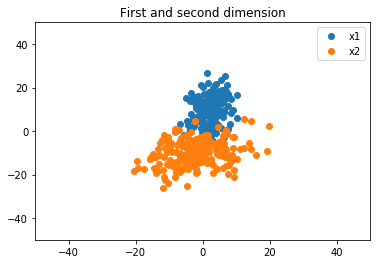

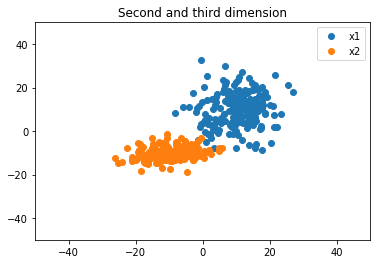

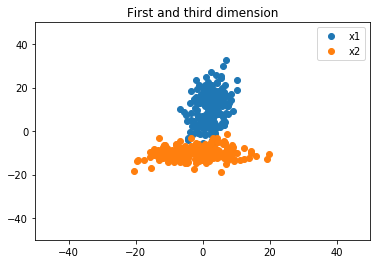

In [20]:
display(X1,X2,50)

In [21]:
z1_2,z2_2,z3_2 = get_points_x1(A,B,C,7)

In [22]:
display(X1,X2,z1,z2,z3)
display_x1(X1,X2,z1_2,z2_2,z3_2)

TypeError: display() takes 3 positional arguments but 5 were given

In [ ]:
x1_test = generate_Gaussian_random_vector(mu1,sigma1,3,200)
x2_test = generate_Gaussian_random_vector(mu2,sigma2,3,200)

In [ ]:

test_classifier(A,B,C,x1_test,x2_test)

In [ ]:
x1_after,x2_after,sigma1_diag,sigma2_diag,mu1_diag,mu2_diag,v_z = diagonalize(a,b,c,alfa,beta,X1,w1,v1,X2,w2,v2,sigma1,sigma2,mu1,mu2)

In [ ]:
display(x1_after,x2_after,10)

In [ ]:
A_,B_,C_ = generate_classifier(sigma1_diag,mu1_diag,sigma2_diag,mu2_diag)

In [ ]:
print(np.cov(x1_after),np.cov(x2_after))

In [ ]:
z1,z2,z3 = get_points(A_,B_,C_,-1)


In [ ]:
z1_x1,z2_x1,z3_x1 = get_points_x1(A_,B_,C_,2)

In [ ]:
display_x3(x1_after,x2_after,
        z1,z2,z3)
display_x1(x1_after,x2_after,
        z1_x1,z2_x1,z3_x1)

In [ ]:
print(np.cov(x1_after))
print(np.cov(x2_after))
print(np.mean(x1_after))

In [ ]:
test_classifier(A_,B_,C_,x1_after,x2_after)

In [ ]:
x1_test_diag = diagonalize_point(x1_test,v1,w1,v2,v_z)

In [ ]:
x2_test_diag = diagonalize_point(x2_test,v1,w1,v2,v_z)

In [ ]:
test_classifier(A_,B_,C_,x1_test_diag,x2_test_diag)